# Data Cleaning and Preperation for Machine Learning

Outlier Handling:
Based on the  data analysis and the histograms, many numerical features have significant outlier counts.
Given the potential use of tree-based models (like Decision Trees, Random Forests, or Gradient Boosting) which are robust to outliers, there will be no outlier handling.
This  avoids potential loss of information that outliers might represent in network traffic data, which could be indicative of anomalous behavior.


Analysis of numerical features and rescaling :
Observing the descriptive statistics, it is evident that the numerical features have different scales and distributions.
For example, 'dur' has a range from 0.0 to nearly 60, while 'sbytes' ranges from 24 to over 14 million.
Features like 'rate' and 'sload' also show very large maximum values compared to their means.
This wide variation in scales can negatively impact the performance of some machine learning models, particularly those that are distance-based or rely on gradient descent.
Therefore, rescaling will be necessary for these types of models to ensure that no single feature dominates the learning process due to its large magnitude.
Rescaling techniques like Standardization or Min-Max Scaling could be used.



## Rescaling

MinMaxScaler was selected as the rescaling strategy for all numerical features, justified by its robustness to outliers and its ability to preserve the shape of skewed distributions.
*   Visualizations (histograms and kde) confirmed that the rescaling compressed the range of numerical features while preserving the general shape of their distributions. Outliers were still present in the rescaled data.

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print("Descriptive statistics of numerical features:")
display(df[numerical_features].describe())

Descriptive statistics of numerical features:


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the DataFrame to store rescaled data
df2 = df.copy()

numerical_features = df2.select_dtypes(include=np.number).columns.tolist()
if 'label' in numerical_features:
    numerical_features.remove('label')

# Instantiate MinMaxScaler
scaler = MinMaxScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
display(df2[numerical_features].describe())

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.677927e-02,0.001660,0.001592,0.000555,0.000903,0.082411,0.709677,0.378312,0.012253,0.030284,...,0.081809,0.067740,0.071973,0.104135,0.004142,0.004190,0.008109,0.092684,0.133840,0.011126
std,7.850742e-02,0.012580,0.010490,0.011956,0.010334,0.148620,0.398092,0.461137,0.034142,0.114931,...,0.145140,0.144647,0.159875,0.184116,0.045586,0.046243,0.039918,0.144812,0.182318,0.104891
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.333334e-07,0.000094,0.000000,0.000006,0.000000,0.000029,0.243137,0.000000,0.000002,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000
50%,2.356334e-04,0.000470,0.000182,0.000036,0.000012,0.002650,0.996078,0.114625,0.000110,0.000101,...,0.017241,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.033898,0.065574,0.000000
75%,1.198934e-02,0.001033,0.000908,0.000087,0.000065,0.111111,0.996078,0.996047,0.012366,0.000762,...,0.086207,0.051724,0.054054,0.080645,0.000000,0.000000,0.000000,0.101695,0.163934,0.000000
max,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature Ranges Before and After Rescaling:



Histograms for numerical features after rescaling


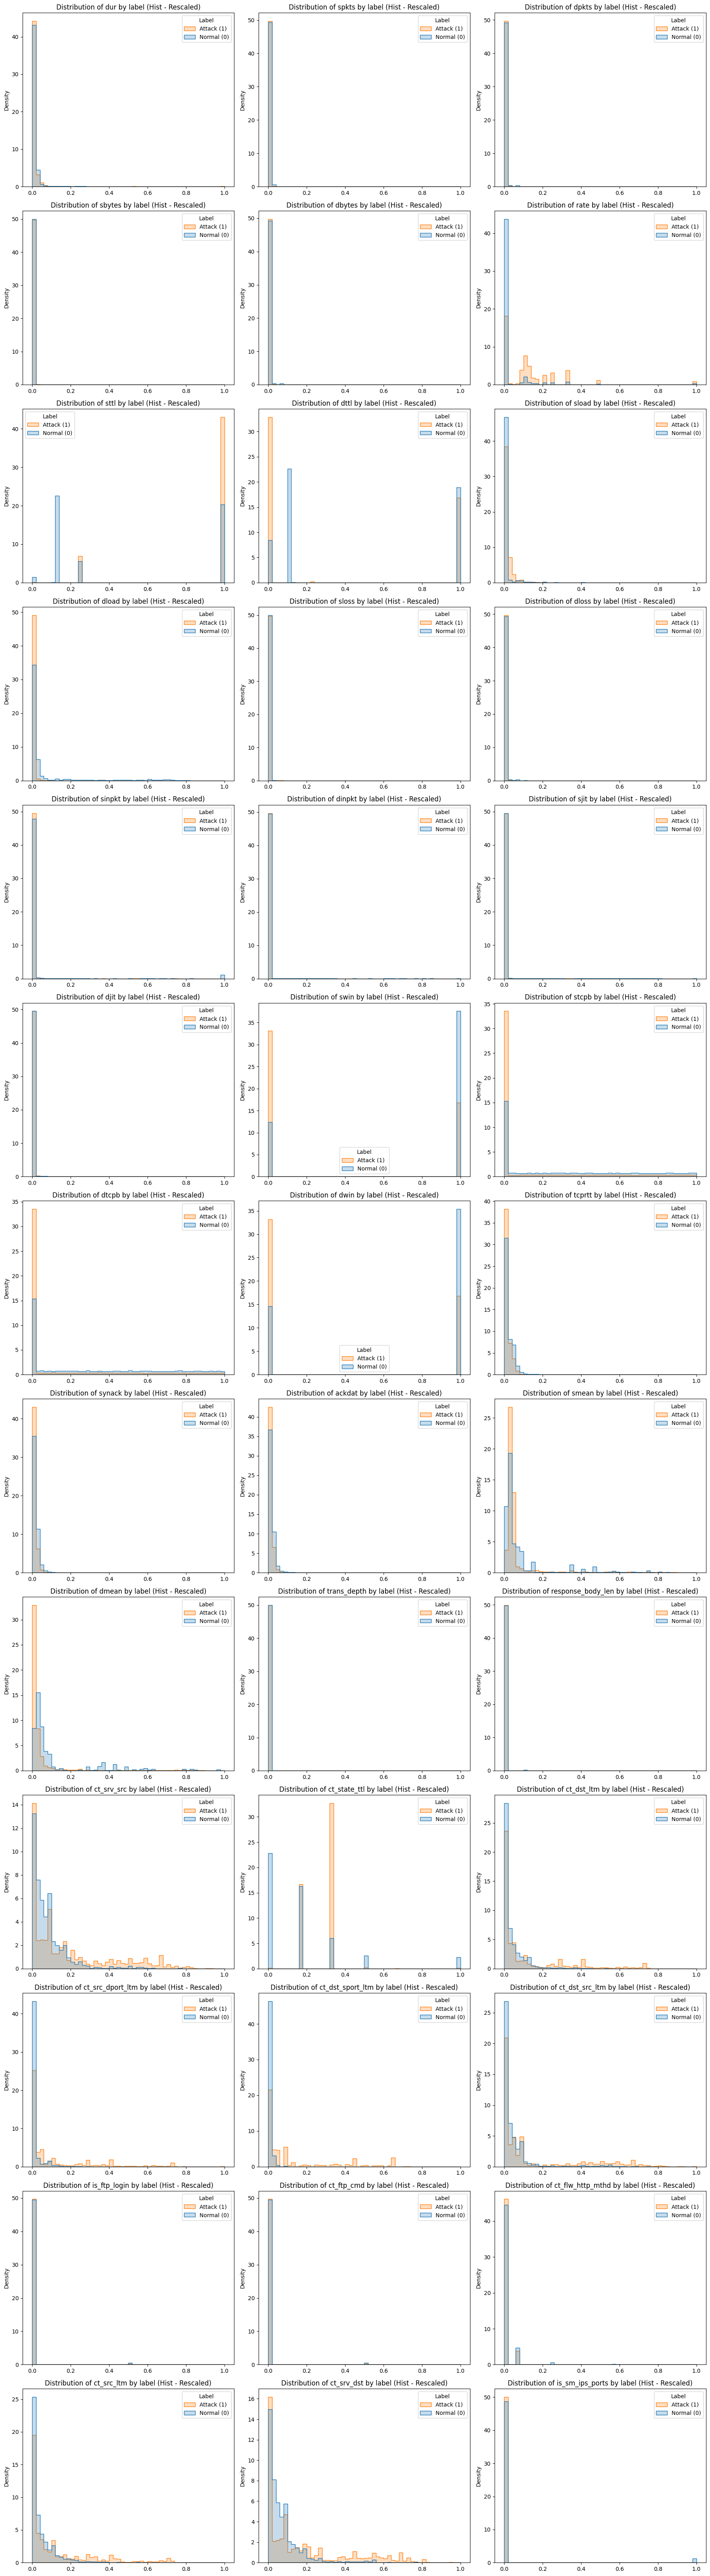


Density plots (KDE) for numerical features after rescaling


/tmp/ipython-input-166-1789963712.py:41: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df2, x=feature, hue=label_col, common_norm=False, ax=axes_kde_rescaled[idx], fill=True)


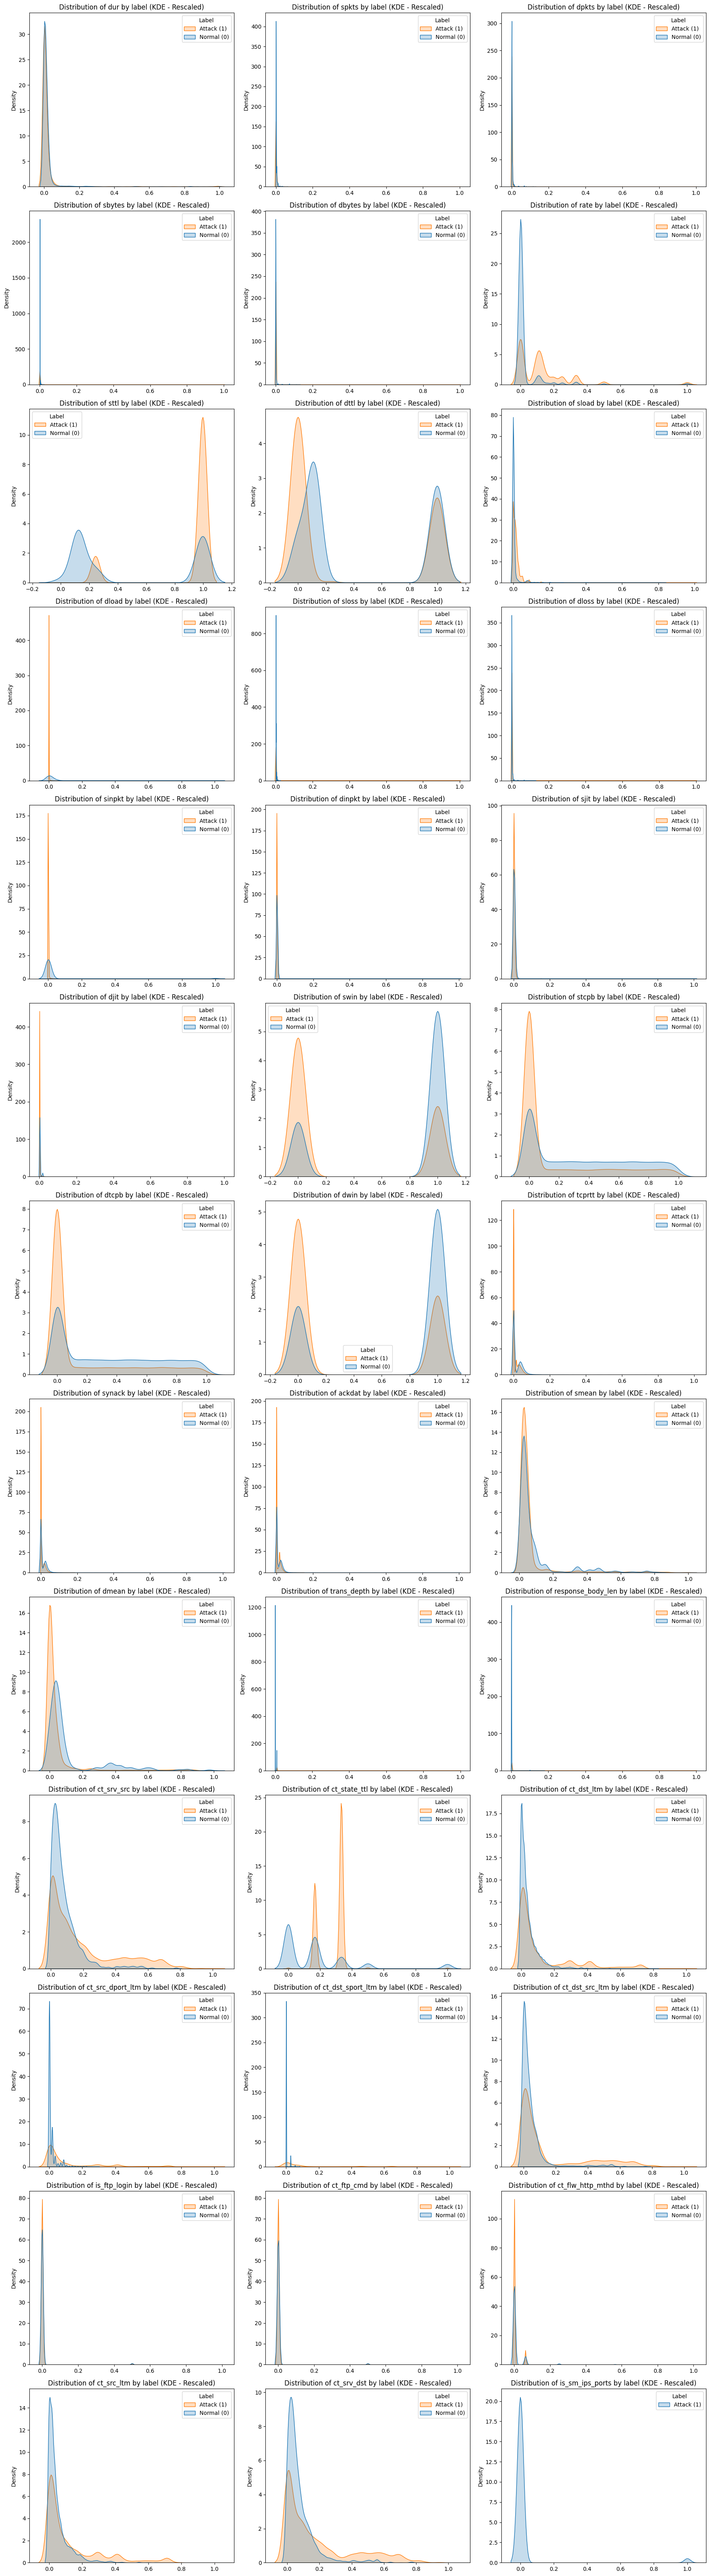

In [ ]:
# Select numerical features from the rescaled dataframe, excluding the label
numerical_features_rescaled = df2.select_dtypes(include=np.number).columns.drop(label_col, errors='ignore')

# --- Histograms (After Rescaling) ---
if len(numerical_features_rescaled) > 0:
    print("Histograms for numerical features after rescaling")
    n_num_features = len(numerical_features_rescaled)
    n_cols = 3
    n_rows = (n_num_features + n_cols - 1) // n_cols

    num_bins = 50

    fig_hist_rescaled, axes_hist_rescaled = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes_hist_rescaled = axes_hist_rescaled.flatten()

    for idx, feature in enumerate(numerical_features_rescaled):
        sns.histplot(data=df2, x=feature, hue=label_col, bins=num_bins, kde=False,
                     element="step", stat="density", common_norm=False, ax=axes_hist_rescaled[idx])
        axes_hist_rescaled[idx].set_title(f'Distribution of {feature} by label (Hist - Rescaled)')
        axes_hist_rescaled[idx].set_xlabel('')
        axes_hist_rescaled[idx].set_ylabel('Density')
        axes_hist_rescaled[idx].legend(title='Label', labels=['Attack (1)', 'Normal (0)'])

    for j in range(idx + 1, len(axes_hist_rescaled)):
        fig_hist_rescaled.delaxes(axes_hist_rescaled[j])

    plt.tight_layout()
    plt.show()

# --- Density Plots (KDE) (After Rescaling) ---
if len(numerical_features_rescaled) > 0:
    print("\nDensity plots (KDE) for numerical features after rescaling")
    n_num_features = len(numerical_features_rescaled)
    n_cols = 3
    n_rows = (n_num_features + n_cols - 1) // n_cols

    fig_kde_rescaled, axes_kde_rescaled = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes_kde_rescaled = axes_kde_rescaled.flatten()

    for idx, feature in enumerate(numerical_features_rescaled):
        sns.kdeplot(data=df2, x=feature, hue=label_col, common_norm=False, ax=axes_kde_rescaled[idx], fill=True)
        axes_kde_rescaled[idx].set_title(f'Distribution of {feature} by label (KDE - Rescaled)')
        axes_kde_rescaled[idx].set_xlabel('')
        axes_kde_rescaled[idx].set_ylabel('Density')
        axes_kde_rescaled[idx].legend(title='Label', labels=['Attack (1)', 'Normal (0)'])
    for j in range(idx + 1, len(axes_kde_rescaled)):
        fig_kde_rescaled.delaxes(axes_kde_rescaled[j])

    plt.tight_layout()
    plt.show()

In [ ]:
if len(numerical_features) > 0:
    range_data = []
    for feature in numerical_features:
        original_min = df[feature].min()
        original_max = df[feature].max()
        rescaled_min = df2[feature].min()
        rescaled_max = df2[feature].max()

        range_data.append({
            'Feature': feature,
            'Original Min': original_min,
            'Original Max': original_max,
            'Rescaled Min': rescaled_min,
            'Rescaled Max': rescaled_max
        })

    range_df = pd.DataFrame(range_data)
    print("Range of numerical features before and after rescaling:")
    display(range_df)
else:
    print("No numerical features to show range.")

Range of numerical features before and after rescaling:


,Feature,Original Min,Original Max,Rescaled Min,Rescaled Max
0,dur,0.0,5.999999e+01,0.0,1.0
1,spkts,1.0,1.064600e+04,0.0,1.0
2,dpkts,0.0,1.101800e+04,0.0,1.0
3,sbytes,24.0,1.435577e+07,0.0,1.0
4,dbytes,0.0,1.465753e+07,0.0,1.0
5,rate,0.0,1.000000e+06,0.0,1.0
6,sttl,0.0,2.550000e+02,0.0,1.0
7,dttl,0.0,2.530000e+02,0.0,1.0
8,sload,0.0,5.268000e+09,0.0,1.0
9,dload,0.0,2.082111e+07,0.0,1.0


## Encoding categorical features

Using label encoding instead of one-hot to reduce dimensionality. Although one-hot is generally the better approach because it avoids introducing a false sense of order that label encoding would create.

In [ ]:
# Label encoding categorical features
from sklearn.preprocessing import LabelEncoder

categorical_features_rescaled = df2.select_dtypes(include='object').columns.tolist()
print("Categorical features in df_rescaled to label encode:", categorical_features_rescaled)

if len(categorical_features_rescaled) > 0:
    for feature in categorical_features_rescaled:
        le = LabelEncoder()
        df2[feature] = le.fit_transform(df2[feature])

    print("\ndf_rescaled after label encoding:")
    display(df2.head())

Categorical features in df_rescaled to label encode: ['proto', 'service', 'state', 'attack_cat']

df_rescaled after label encoding:


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1.833334e-07,117,0,4,0.000094,0.0,0.000033,0.0,0.090909,0.996078,...,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,6,0
1,1.333334e-07,117,0,4,0.000094,0.0,0.000121,0.0,0.125000,0.996078,...,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,6,0
2,8.333335e-08,117,0,4,0.000094,0.0,0.000073,0.0,0.200000,0.996078,...,0.0,0.032258,0.0,0.0,0.0,0.000000,0.032787,0.0,6,0
3,1.000000e-07,117,0,4,0.000094,0.0,0.000061,0.0,0.166667,0.996078,...,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,6,0
4,1.666667e-07,117,0,4,0.000094,0.0,0.000146,0.0,0.100000,0.996078,...,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,6,0
